In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os 

TODO: 
- Get the files with all the vortex trajectories 

In [8]:
sample_arr = np.loadtxt('csvT1_S200_s500000_alltraj.csv')
avg_arr = np.loadtxt('csvT1_S200_s500000.csv')

print(sample_arr.shape)

time0 = 250 # initial time to start counting 
sample_arr = sample_arr.T[time0:][0:10] # throw away the parts of the array that are at t < time0 
distance0 = 9 # threshold distance - everything that reaches this point after t = time0 can be counted 


sample_arr = sample_arr.T

(200, 2002)


In [9]:
# filter to choose the parts of the array that are counted: 

for i in range(len(sample_arr)): 
    if sample_arr[i][0] > distance0:
        sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the array to nan to eliminate it 

valid_trajectories = [] 
threshold_time = [] 

for i in range(len(sample_arr)): # iterate over the samples 
    for j in range(len(sample_arr[0])): # iterate over time 
        if sample_arr[i][j] != np.nan and sample_arr[i][j] >= distance0: 
            time = j 
            threshold_time.append(j)
            valid_trajectories.append(sample_arr[i].copy())
            sample_arr[i] = np.full(len(sample_arr[i]), np.nan) # set the row equal to nan to avoid repeats 




In [10]:
print(np.shape(valid_trajectories))

(9, 10)


0
1
2
3
4
5
6
7
8


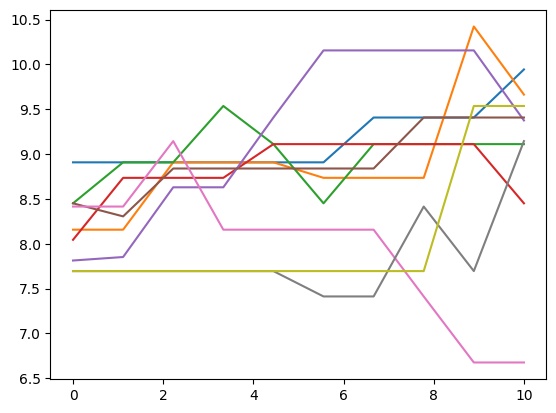

In [21]:
for i in range(9): 
    print(i)
    plt.plot(np.linspace(0,len(valid_trajectories[i]),len(valid_trajectories[i])), valid_trajectories[i])

In [12]:
# #default_x = np.linspace(0,len(threshold_time), len(threshold_time))
# for i in range(40,50): 
#     xaxis = np.linspace(-threshold_time[i], len(valid_trajectories[i])-threshold_time[i], len(valid_trajectories[i]))
#     plt.plot(xaxis, valid_trajectories[i])
#     plt.vlines(0, 4, 20, linewidth = 3, color = 'black')
#     plt.hlines(9, -500, 1500, linewidth = 3, color = 'black')
#     plt.xlim(-1,1)
#     plt.ylim(8,10)


In [13]:
# remove trajectory values that correspond to negative time
valid_trajectories_0start = [] 
max_length = max(map(len, valid_trajectories))

#print(max_length)
for i in range(len(valid_trajectories)): 
    # xaxis = np.linspace(-threshold_time[i], len(valid_trajectories[i])-threshold_time[i], len(valid_trajectories[i]))
    # ind = np.where(np.abs(xaxis) < 0.1 )[0]
    # print(xaxis[0:20])
    # print(ind)

    adjusted_trajectory = valid_trajectories[i][threshold_time[i]:]
    # print(threshold_time[i])
    # print(np.shape(adjusted_trajectory))
    padded_trajectory = np.pad(adjusted_trajectory, (0,max_length-len(adjusted_trajectory)), 'constant', constant_values = np.nan)
    
    valid_trajectories_0start.append(np.pad(adjusted_trajectory, (0,max_length-len(adjusted_trajectory)), 'constant', constant_values = np.nan)) 
    

In [14]:
print(np.shape(valid_trajectories_0start))

(9, 10)


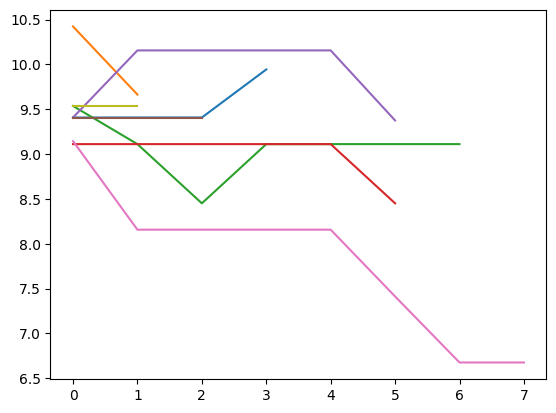

In [15]:
for i in range(len(valid_trajectories_0start)): 
    plt.plot(valid_trajectories_0start[i])
# calculate the average

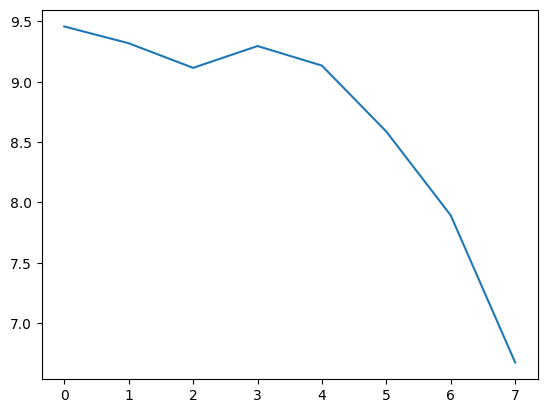

In [16]:
avg_shifted_traj = np.ma.average(np.ma.masked_array(valid_trajectories_0start, np.isnan(valid_trajectories_0start)), axis = 0)

plt.figure() 
plt.plot(avg_shifted_traj)

In [17]:
print(avg_shifted_traj)

[9.457540159991362 9.31866950570928 9.11485068783564 9.295630648382751
 9.133616032869483 8.586990350896038 7.892932630862552 6.675002926029321
 -- --]


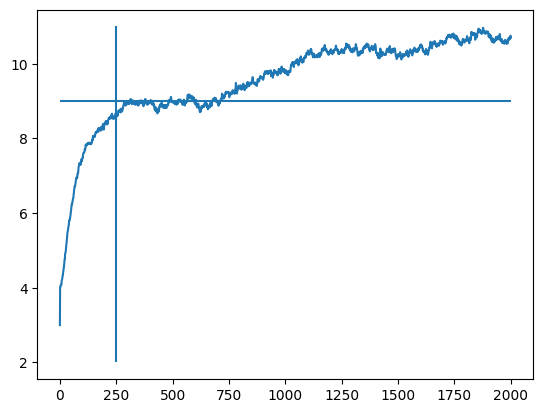

In [18]:
plt.plot(avg_arr)
plt.vlines(250,2,11)
plt.hlines(9,0,2000)